# ***Wind Power Output Prediction System***

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
pd.set_option('display.max_columns',None)

#### *Formating the Dataset*

In [9]:
df =  pd.read_csv("corrected_dataset.csv")

In [10]:
df

,Time,Global Solar,Solar Altitude,Solar Azimuth,Solar Angle of Incidence,Solar Cell Temperature,Solar Insolation,Solar Power Output,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Wind turbine Power Output,AC Primary Load,AC Primary Load Served,Autosize Genset Power Output,Autosize Genset Operating Status,Autosize Genset Fuel,Total Electrical Load Served,Renewable Penetration,Excess Electrical Production,Unmet Electrical Load,Total Renewable Power Output,Inverter Power Input,Inverter Power Output,Rectifier Power Input,Rectifier Power Output,Battery Maximum Charge Power,Battery Maximum Discharge Power,Battery Charge Power,Battery Discharge Power,Battery Input Power,Battery Energy Content,Battery State of Charge,Battery Energy Cost,AC Required Operating Capacity,DC Required Operating Capacity,AC Operating Capacity,DC Operating Capacity
0,01-01-2007 00:00,0.0,0.0,-6.78795,90.0,25.63279,0.0,0.0,25.63279,4.805443,0,0.389832,3.625400,3.625400,0.0,0,0.0,3.625400,10.752790,0.0,4.440000e-16,0.389832,3.816211,3.625400,0.0,0.0,0.000000,71.68927,0.0,3.426379,-3.426379,174.7645,97.91775,0.000000,3.987940,0.194916,0,72.07910
1,01-01-2007 01:00,0.0,0.0,-45.35176,90.0,25.63279,0.0,0.0,25.63279,4.303294,0,0.261417,3.560493,3.560493,0.0,0,0.0,3.560493,7.342164,0.0,0.000000e+00,0.261417,3.747887,3.560493,0.0,0.0,2.038244,69.95676,0.0,3.486470,-3.486470,170.9829,95.79897,0.000000,3.916542,0.130709,0,70.21818
2,01-01-2007 02:00,0.0,0.0,-60.21218,90.0,25.63279,0.0,0.0,25.63279,2.636609,0,0.000000,5.328364,5.328364,0.0,0,0.0,5.328364,0.000000,0.0,0.000000e+00,0.000000,5.608804,5.328364,0.0,0.0,3.865145,68.40389,0.0,5.608804,-5.608804,164.8993,92.39043,0.000000,5.861200,0.000000,0,68.40389
3,01-01-2007 03:00,0.0,0.0,-65.94936,90.0,25.63279,0.0,0.0,25.63279,3.167456,0,0.065723,6.730248,6.730248,0.0,0,0.0,6.730248,0.976531,0.0,8.880000e-16,0.065723,7.084472,6.730248,0.0,0.0,6.919585,65.80762,0.0,7.018749,-7.018749,157.2864,88.12504,0.000000,7.403273,0.032861,0,65.87334
4,01-01-2007 04:00,0.0,0.0,-68.03603,90.0,25.63279,0.0,0.0,25.63279,4.522918,0,0.299256,7.013267,7.013267,0.0,0,0.0,7.013267,4.267004,0.0,0.000000e+00,0.299256,7.382386,7.013267,0.0,0.0,10.655370,62.63220,0.0,7.083129,-7.083129,149.6037,83.82053,0.000000,7.714593,0.149628,0,62.93146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2007 19:00,0.0,0.0,68.21178,90.0,25.52278,0.0,0.0,25.52278,5.808934,0,0.924124,5.577013,5.577013,0.0,0,0.0,5.577013,16.570230,0.0,1.780000e-15,0.924124,5.870540,5.577013,0.0,0.0,6.524326,66.14359,0.0,4.946416,-4.946416,160.2542,89.78783,0.013742,6.134714,0.462062,0,67.06771
8756,31-12-2007 20:00,0.0,0.0,67.63509,90.0,25.52278,0.0,0.0,25.52278,5.503632,0,0.690560,5.268395,5.268395,0.0,0,0.0,5.268395,13.107600,0.0,8.880000e-16,0.690560,5.545679,5.268395,0.0,0.0,9.075544,63.97506,0.0,4.855119,-4.855119,154.9881,86.83732,0.013742,5.795235,0.345280,0,64.66561
8757,31-12-2007 21:00,0.0,0.0,64.81570,90.0,25.52278,0.0,0.0,25.52278,6.946388,0,2.057582,4.062646,4.062646,0.0,0,0.0,4.062646,50.646350,0.0,0.000000e+00,2.057582,4.276470,4.062646,0.0,0.0,11.558480,61.86456,0.0,2.218888,-2.218888,152.5814,85.48887,0.013742,4.468911,1.028791,0,63.92214
8758,31-12-2007 22:00,0.0,0.0,57.46185,90.0,25.52278,0.0,0.0,25.52278,6.045575,0,1.127979,5.339394,5.339394,0.0,0,0.0,5.339394,21.125600,0.0,0.000000e+00,1.127979,5.620415,5.339394,0.0,0.0,12.478060,61.08291,0.0,4.492436,-4.492436,147.7086,82.75876,0.013742,5.873334,0.563989,0,62.21089


In [11]:
df.columns

Index(['Time', 'Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Solar Power Output', 'Ambient Temperature',
       'Wind Speed', 'Wind turbine Operating Status',
       'Wind turbine Power Output', 'AC Primary Load',
       'AC Primary Load Served', 'Autosize Genset Power Output',
       'Autosize Genset Operating Status', 'Autosize Genset Fuel',
       'Total Electrical Load Served', 'Renewable Penetration',
       'Excess Electrical Production', 'Unmet Electrical Load',
       'Total Renewable Power Output', 'Inverter Power Input',
       'Inverter Power Output', 'Rectifier Power Input',
       'Rectifier Power Output', 'Battery Maximum Charge Power',
       'Battery Maximum Discharge Power', 'Battery Charge Power',
       'Battery Discharge Power', 'Battery Input Power',
       'Battery Energy Content', 'Battery State of Charge',
       'Battery Energy Cost', 'AC Required Operating Capacity',


In [12]:
df = df.drop( ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Solar Power Output','AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity'],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time                           8760 non-null   object 
 1   Ambient Temperature            8760 non-null   float64
 2   Wind Speed                     8760 non-null   float64
 3   Wind turbine Operating Status  8760 non-null   int64  
 4   Wind turbine Power Output      8760 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 342.3+ KB


In [14]:
df["Time"]  = pd.to_datetime(df["Time"],format="mixed")

In [15]:
# df.to_csv("corrected_dataset.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time                           8760 non-null   datetime64[ns]
 1   Ambient Temperature            8760 non-null   float64       
 2   Wind Speed                     8760 non-null   float64       
 3   Wind turbine Operating Status  8760 non-null   int64         
 4   Wind turbine Power Output      8760 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 342.3 KB


In [17]:
df

,Time,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Wind turbine Power Output
0,2007-01-01 00:00:00,25.63279,4.805443,0,0.389832
1,2007-01-01 01:00:00,25.63279,4.303294,0,0.261417
2,2007-01-01 02:00:00,25.63279,2.636609,0,0.000000
3,2007-01-01 03:00:00,25.63279,3.167456,0,0.065723
4,2007-01-01 04:00:00,25.63279,4.522918,0,0.299256
...,...,...,...,...,...
8755,2007-12-31 19:00:00,25.52278,5.808934,0,0.924124
8756,2007-12-31 20:00:00,25.52278,5.503632,0,0.690560
8757,2007-12-31 21:00:00,25.52278,6.946388,0,2.057582
8758,2007-12-31 22:00:00,25.52278,6.045575,0,1.127979


In [18]:
df.columns

Index(['Time', 'Ambient Temperature', 'Wind Speed',
       'Wind turbine Operating Status', 'Wind turbine Power Output'],
      dtype='object')

#### *Correlation between Features*

Text(0.5, 1.0, 'Correlation Heatmap')

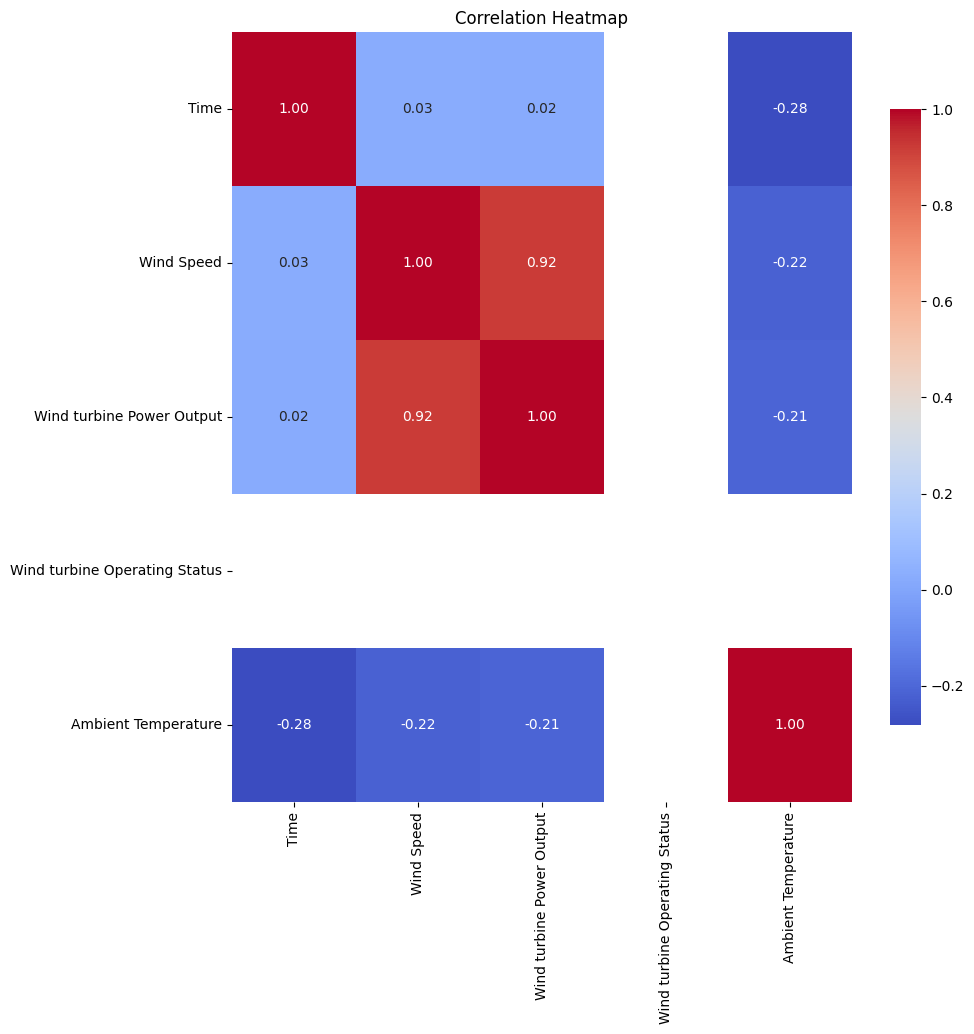

In [19]:
columns = ['Time', 'Wind Speed', 'Wind turbine Power Output',
       'Wind turbine Operating Status', 'Ambient Temperature']
corr = df[columns].corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",ax = ax,cbar_kws={"shrink":.8})
ax.set_title("Correlation Heatmap")

#### *Dataset Features Information*

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time                           8760 non-null   datetime64[ns]
 1   Ambient Temperature            8760 non-null   float64       
 2   Wind Speed                     8760 non-null   float64       
 3   Wind turbine Operating Status  8760 non-null   int64         
 4   Wind turbine Power Output      8760 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 342.3 KB


#### *Checking Zero Values* 

In [21]:
for column in columns:
    print(column, ": ", (df[column]==0).sum())

Time :  0
Wind Speed :  0
Wind turbine Power Output :  1149
Wind turbine Operating Status :  8760
Ambient Temperature :  0


##### *Note: "0" indicates ON state of wind turbine and "1" indicates OFF state**

In [22]:
# Assuming df is your DataFrame
zero_power_output = df[df['Wind turbine Power Output'] == 0]

# Wind speeds where the power output is zero
zero_power_wind_speeds = zero_power_output['Wind Speed']

# Highest wind speed where the power output is zero
highest_zero_power_wind_speed = zero_power_wind_speeds.max()

print("Wind speeds where the power output is zero:")
print(zero_power_wind_speeds.count())

print("\nHighest wind speed where the power output is zero:")
print(highest_zero_power_wind_speed)


Wind speeds where the power output is zero:
1149

Highest wind speed where the power output is zero:
23.44898


In [23]:
# Wind speeds where the power output is zero and wind speed is less than 2.8
zero_power_wind_speeds_less_than_2_8 = zero_power_output[zero_power_output['Wind Speed'] < 2.8]['Wind Speed']
zero_power_wind_speeds_greater_than_2_8 = zero_power_output[zero_power_output['Wind Speed'] > 2.8]['Wind Speed']


# Count of wind speed values less than 2.8 when the power output is zero
count = zero_power_wind_speeds_less_than_2_8.count()

print("Count of wind speed values less than 2.8:",count)

count_2 = zero_power_wind_speeds_greater_than_2_8.count()

print("Count of wind speed values greater than 2.8:",count_2)

print(zero_power_wind_speeds_greater_than_2_8)

Count of wind speed values less than 2.8: 1147
Count of wind speed values greater than 2.8: 2
3879    23.44898
5845    22.48232
Name: Wind Speed, dtype: float64


##### *Note: Zero values in Wind turbine power output are because of cut-in(2.8) and cut-out(~20-25) wind speed.*

In [24]:
df.columns

Index(['Time', 'Ambient Temperature', 'Wind Speed',
       'Wind turbine Operating Status', 'Wind turbine Power Output'],
      dtype='object')

#### *Exploratory Data Analysis* 

In [25]:
colors = ["skyblue","salmon","green","purple"]
features = ['Ambient Temperature', 'Wind Speed',
       'Wind turbine Operating Status', 'Wind turbine Power Output']

#### *Histogram*

In [26]:
def plot_histplot(df,colors,features):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
    fig.suptitle("Distribution Plots for Features")

    # Flatten the axes array
    axes = axes.flatten()
    
    # Plot histograms and density plots
    for i, feature in enumerate(features ): 
        color = colors[i % len(colors)]  # Cycle through colors
        sns.histplot(df[feature], kde=True, ax=axes[i], color=color)
        axes[i].set_title(f"{feature} Distribution")

    # Remove unused subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


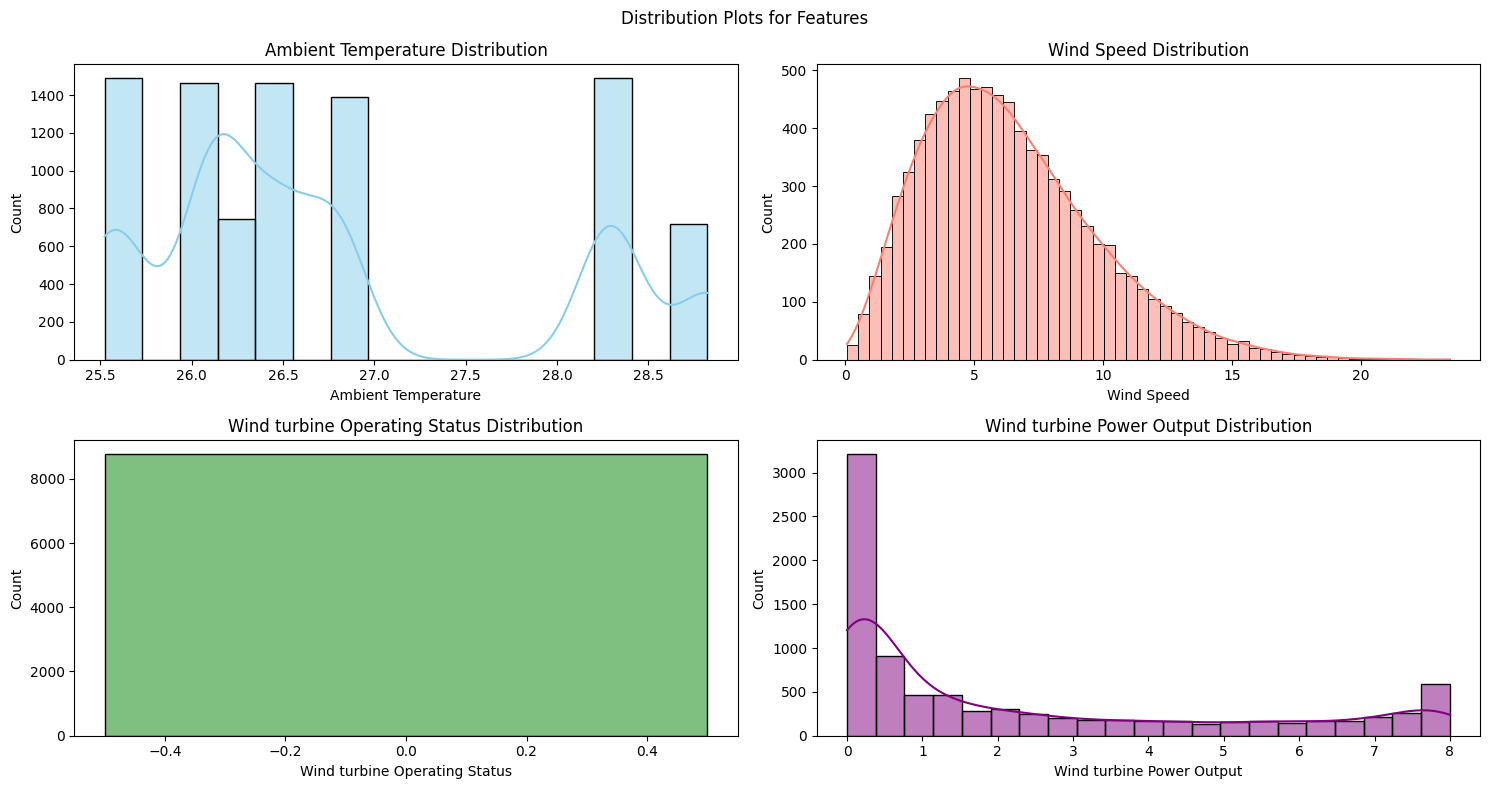

In [27]:
plot_histplot(df,colors,features)

### *Line plot over year*

In [28]:
features = ['Ambient Temperature', 'Wind Speed',
        'Wind turbine Power Output']

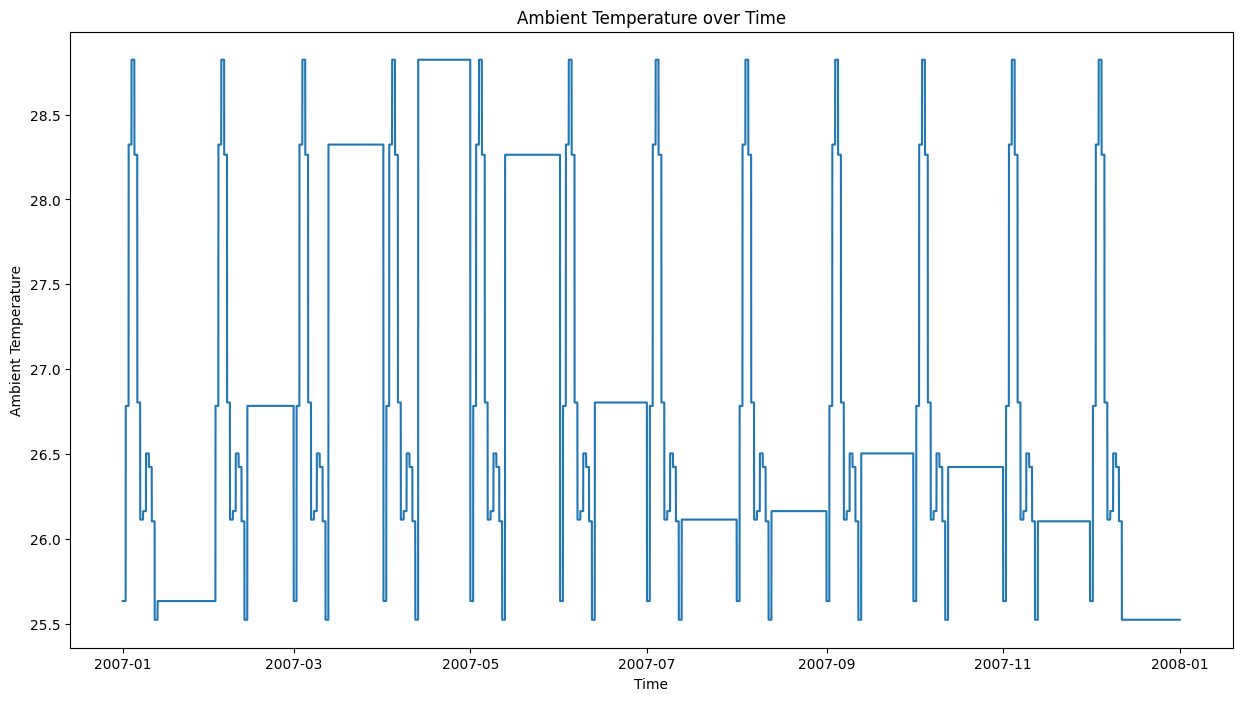

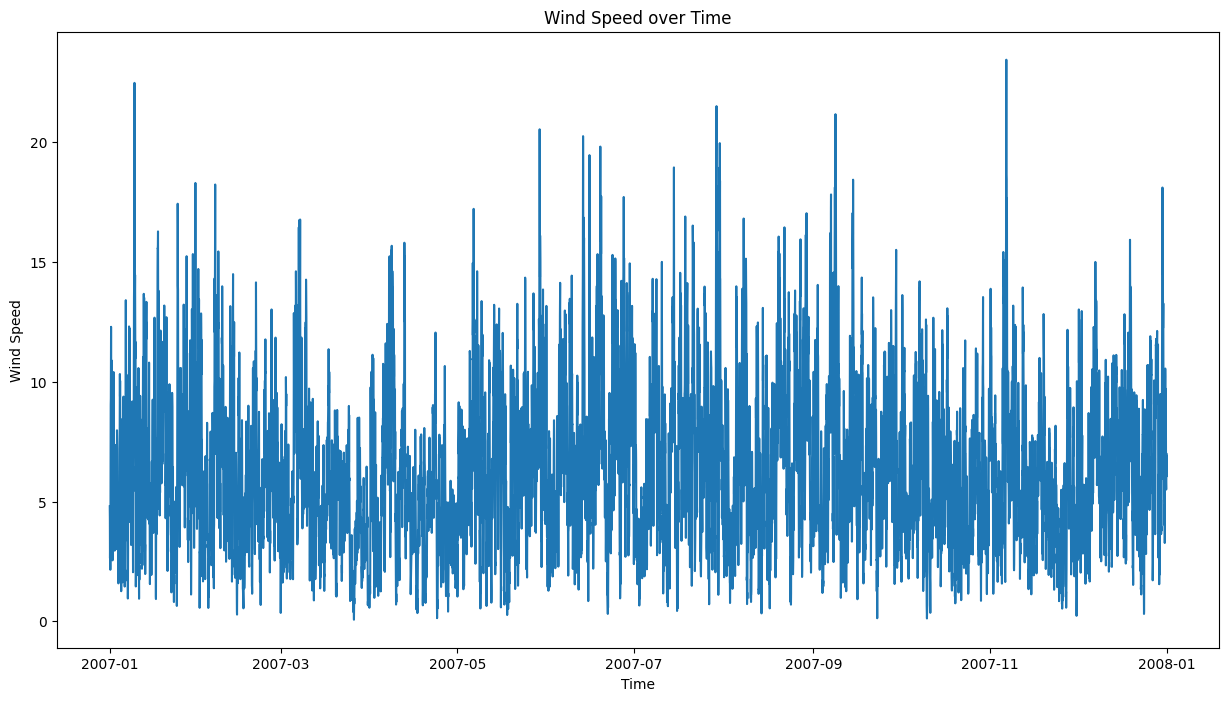

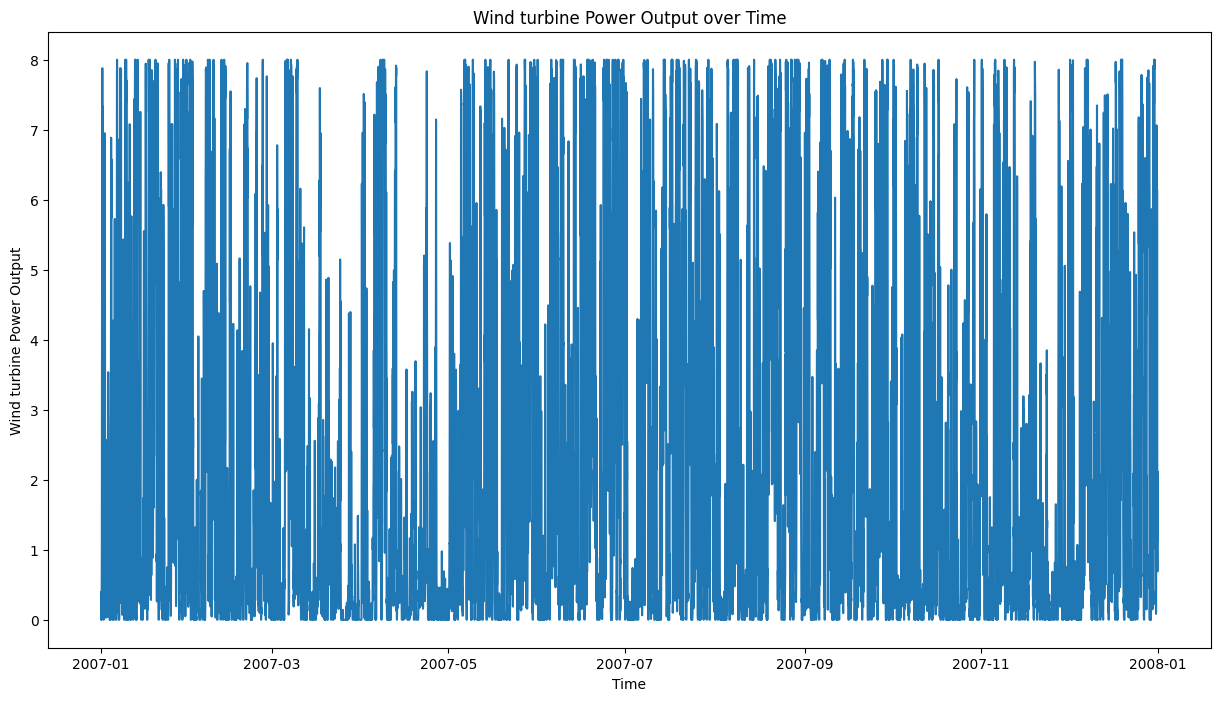

In [29]:
for feature in features:
    plt.figure(figsize=(15, 8))
    sns.lineplot(x="Time", y=feature, data=df)
    plt.title(f'{feature} over Time')
    plt.show()

#### *Line plot over day*

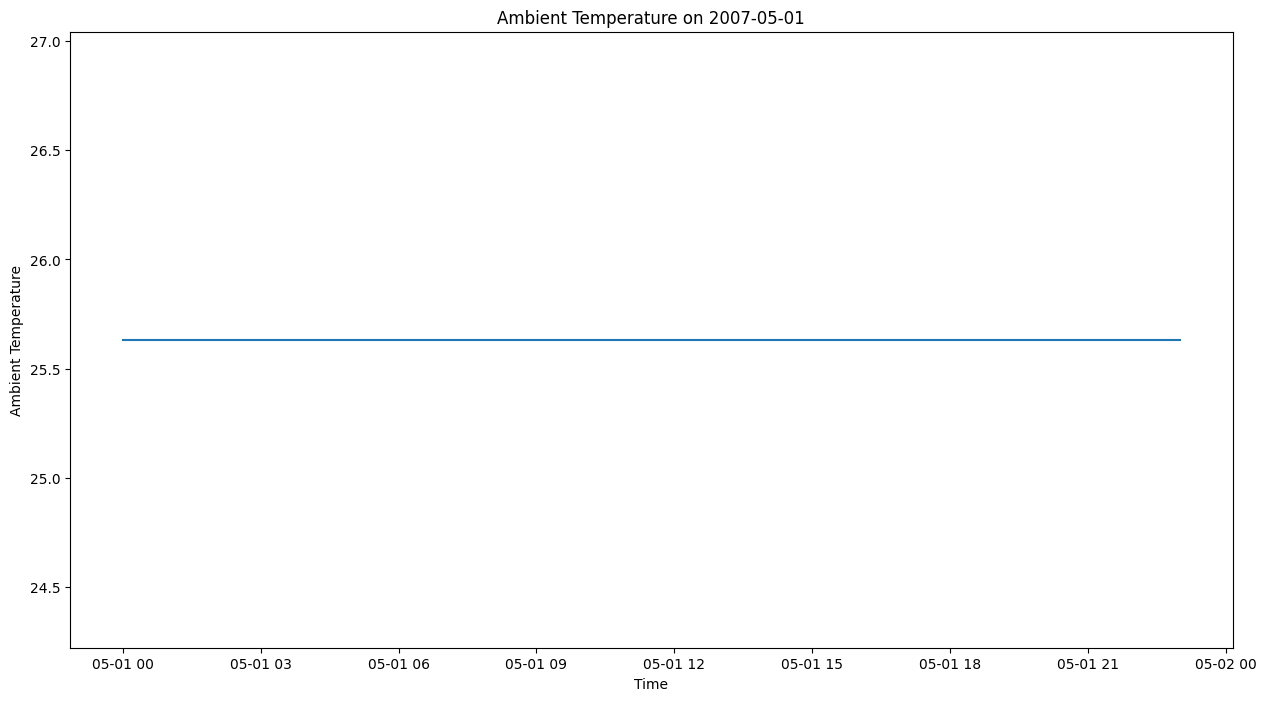

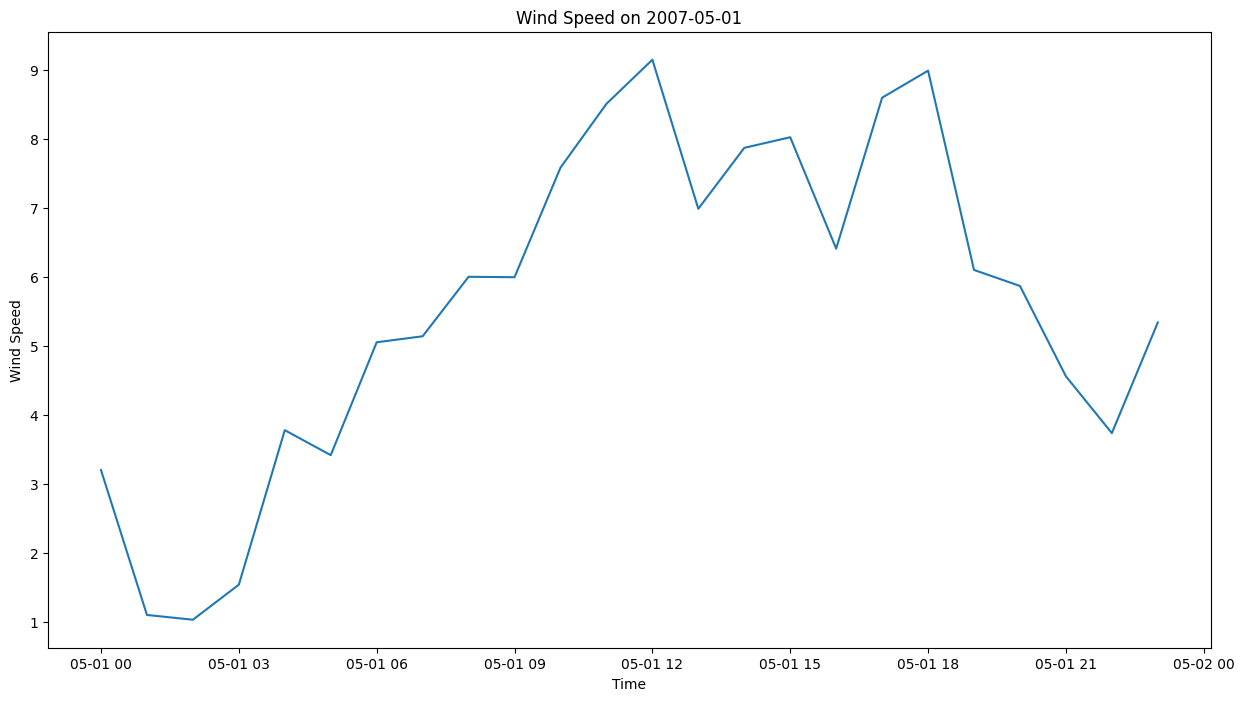

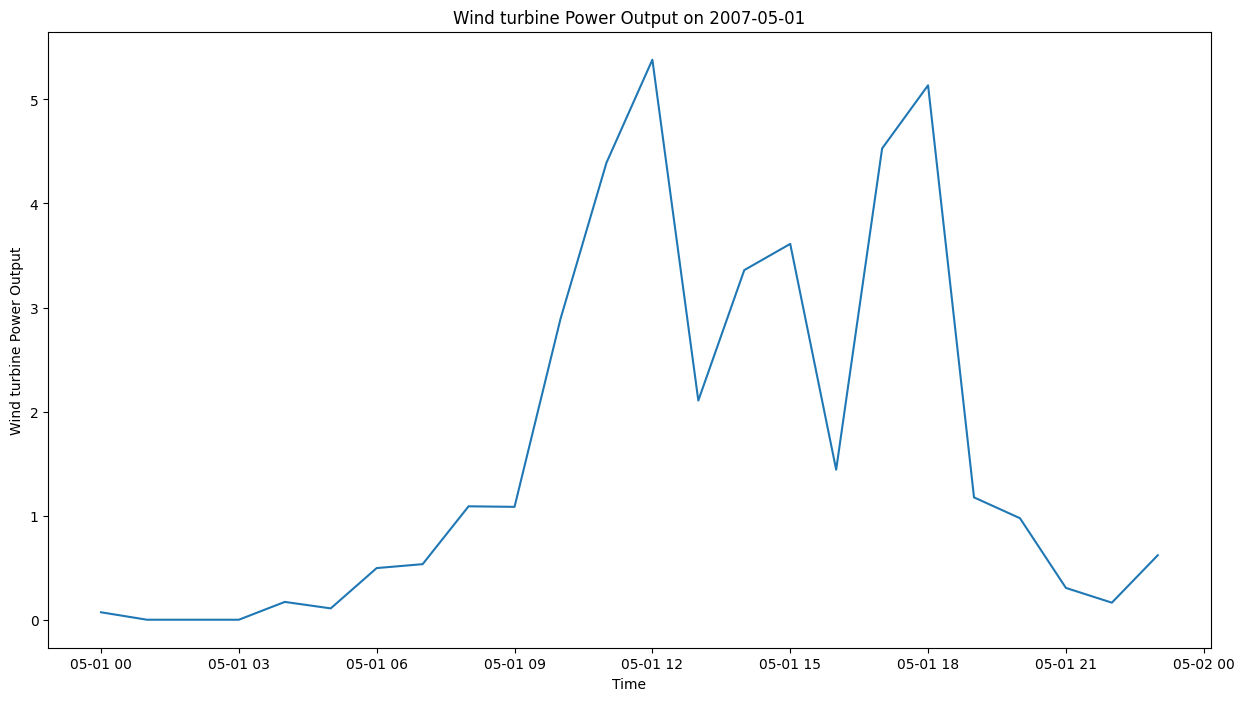

In [30]:
# Assuming 'Time' is your time column and is in datetime format
day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# Filter the DataFrame to include only the specified day
df_day = df[df['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

for feature in features:
    plt.figure(figsize=(15, 8))
    sns.lineplot(x="Time", y=feature, data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()


#### *Scatter plot over a Year*

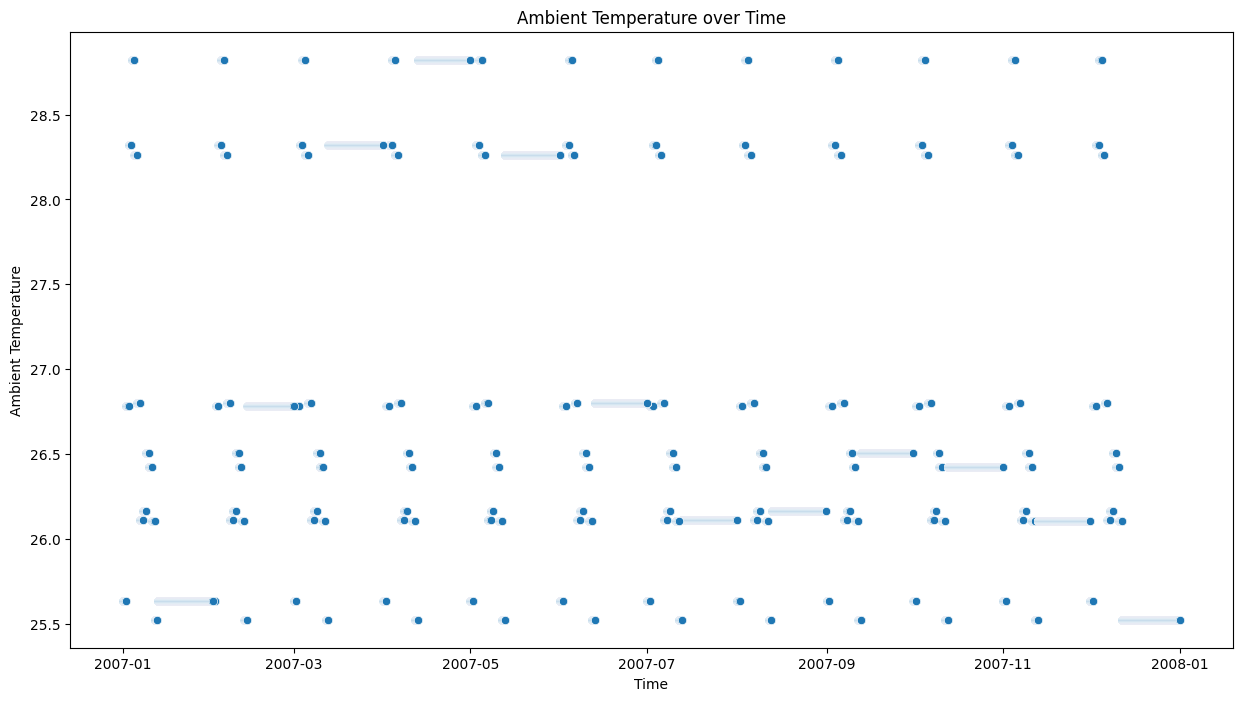

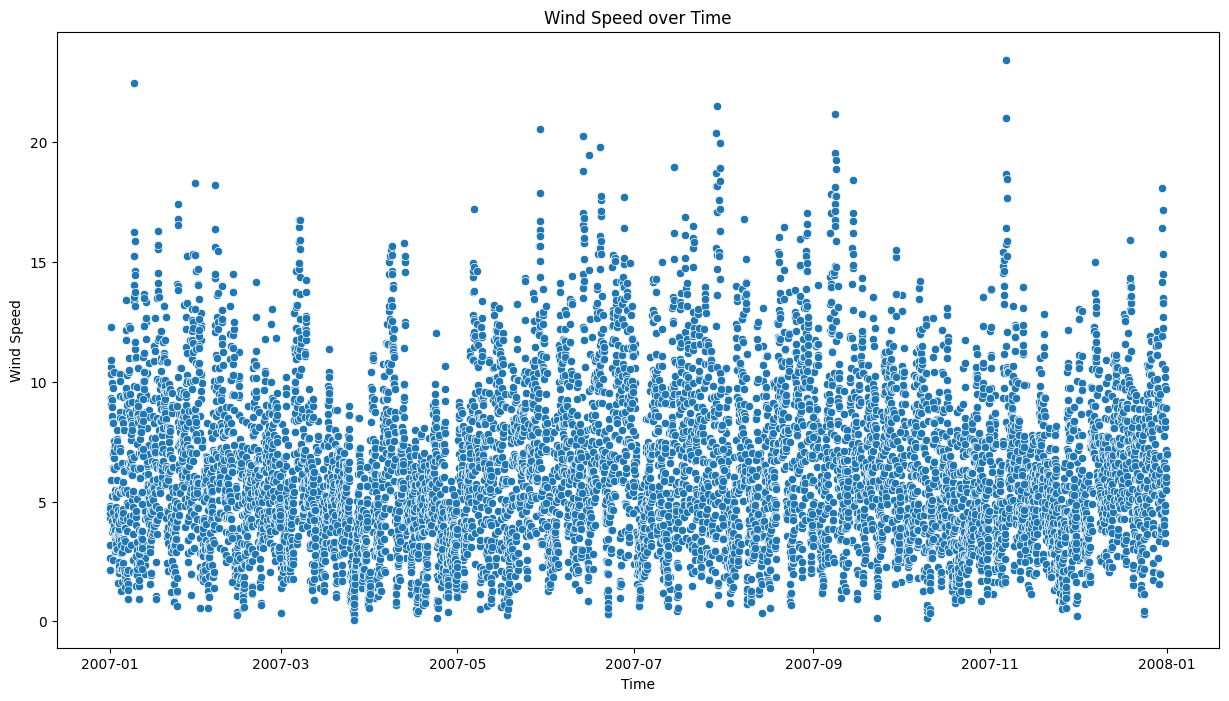

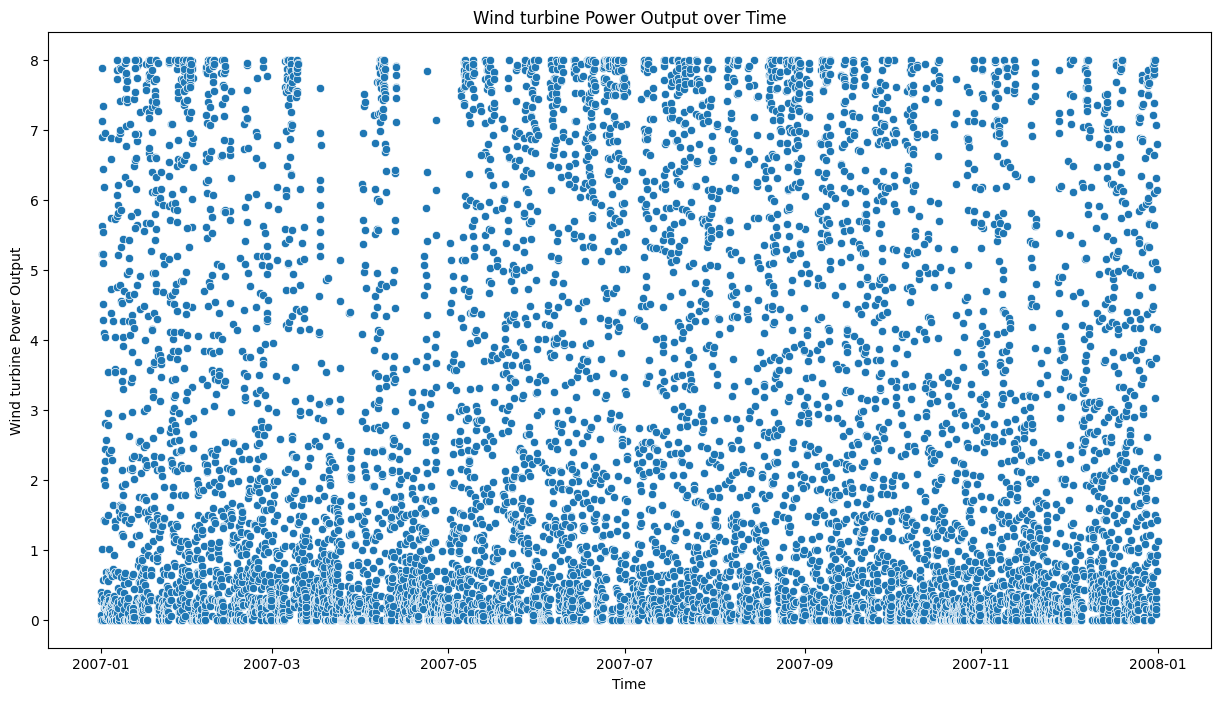

In [31]:
for feature in features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x="Time", y=feature, data=df)
    plt.title(f'{feature} over Time')
    plt.show()

#### *Scatter plot over a Day*

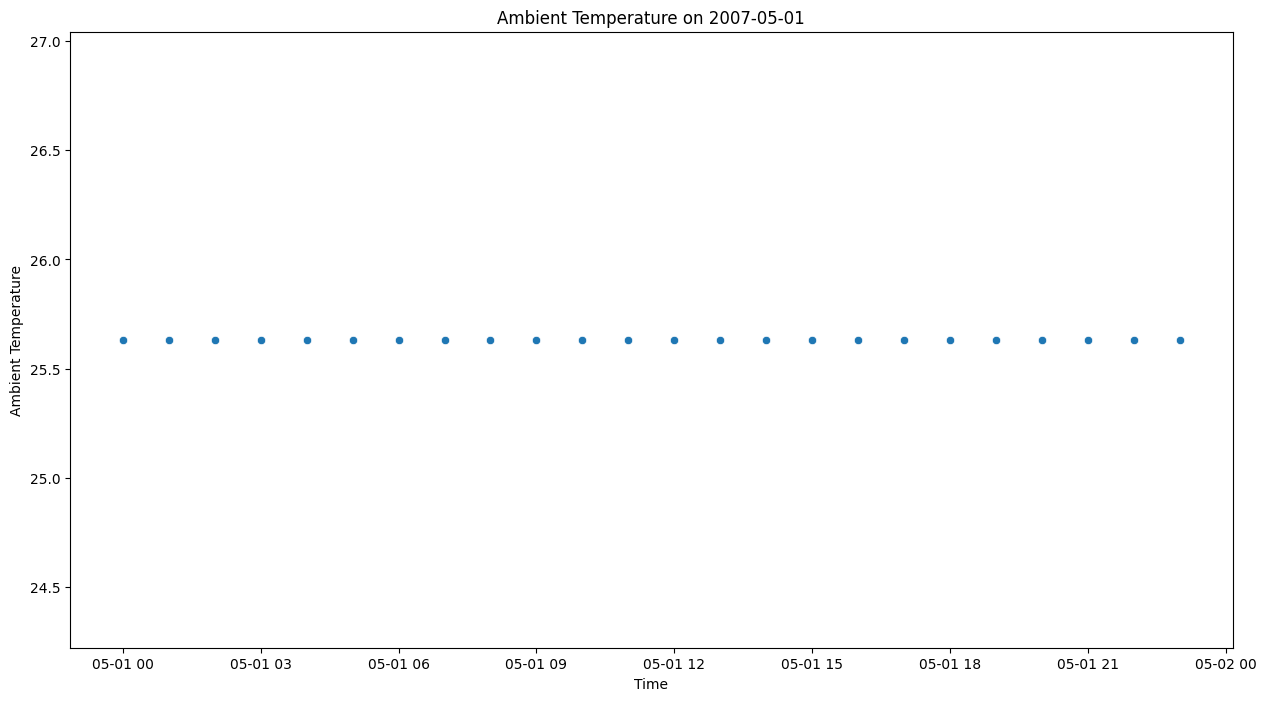

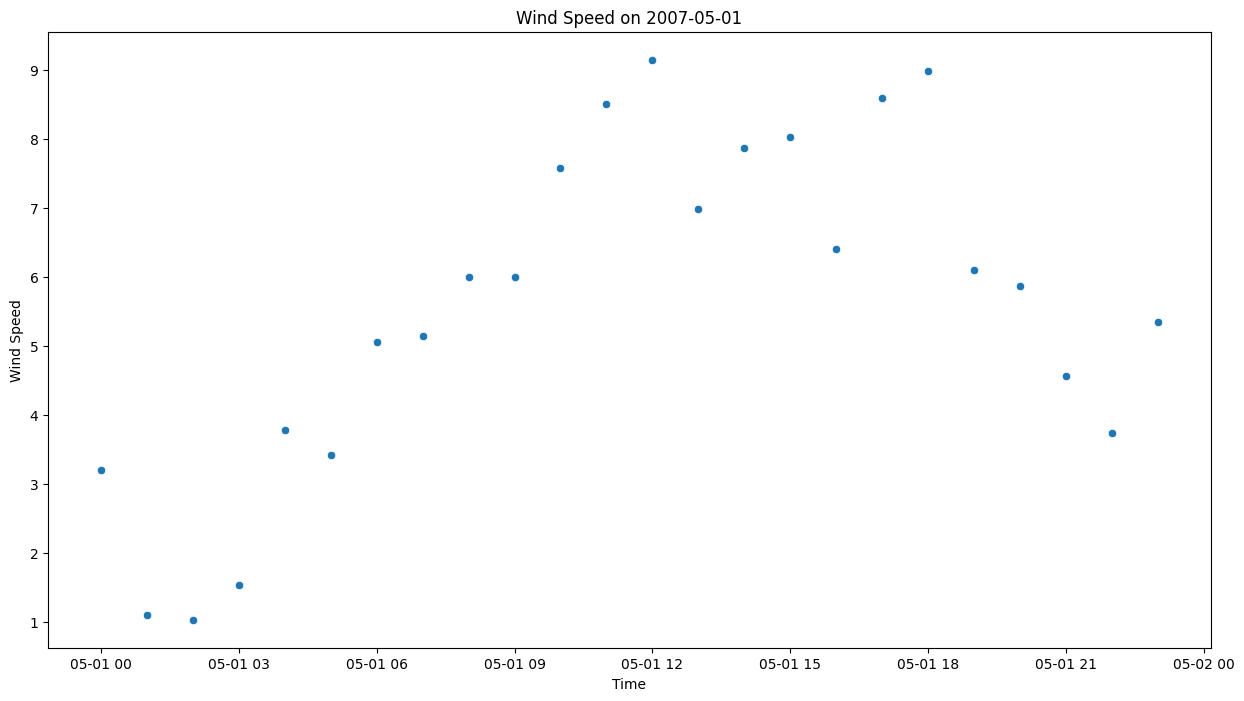

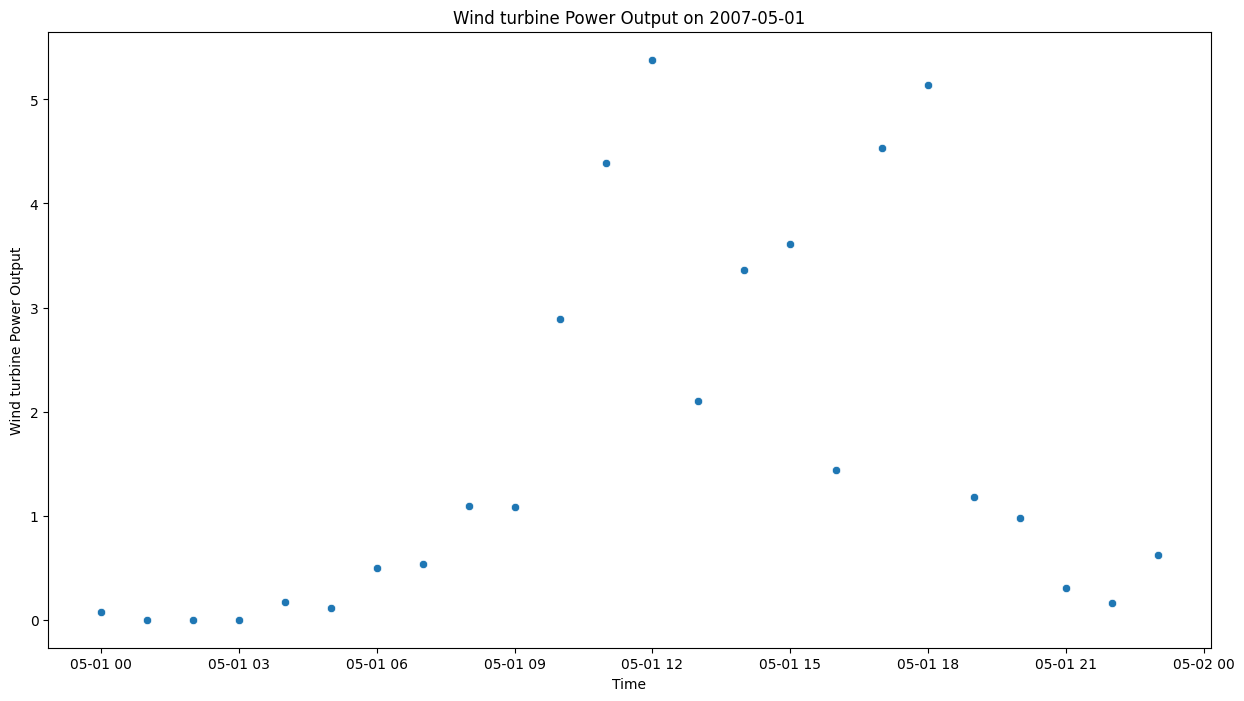

In [32]:
# Assuming 'Time' is your time column and is in datetime format
day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# Filter the DataFrame to include only the specified day
df_day = df[df['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

for feature in features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x="Time", y=feature, data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()


#### *Statistics about the Features*

In [33]:
df.describe()

,Time,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Wind turbine Power Output
count,8760,8760.000000,8760.000000,8760.0,8760.000000
mean,2007-07-02 11:30:00,26.785000,6.372500,0.0,2.322340
min,2007-01-01 00:00:00,25.522780,0.067924,0.0,0.000000
25%,2007-04-02 05:45:00,26.102840,3.869561,0.0,0.186565
50%,2007-07-02 11:30:00,26.422880,5.870278,0.0,0.975872
75%,2007-10-01 17:15:00,28.263080,8.361669,0.0,4.163606
max,2007-12-31 23:00:00,28.823140,23.448980,0.0,8.000000
std,NaN,1.050378,3.366850,0.0,2.677432


#### *Studying Outliers*

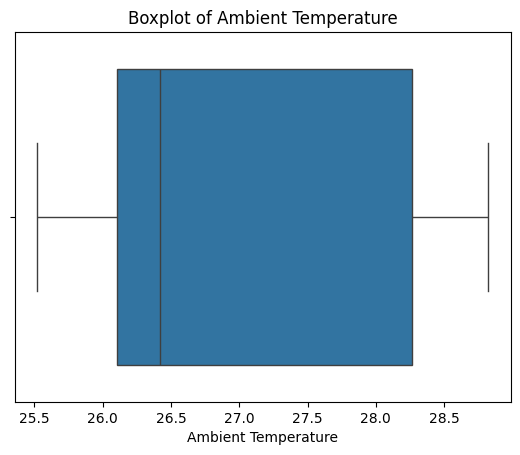

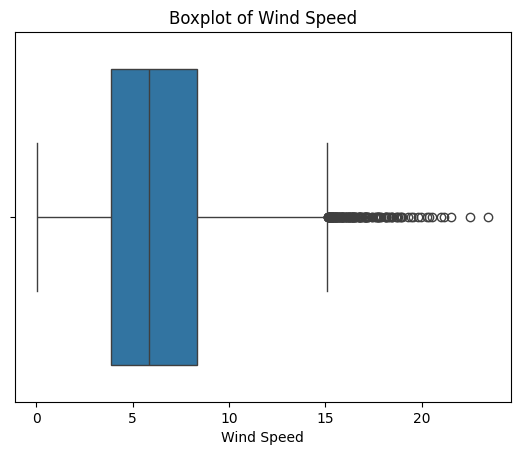

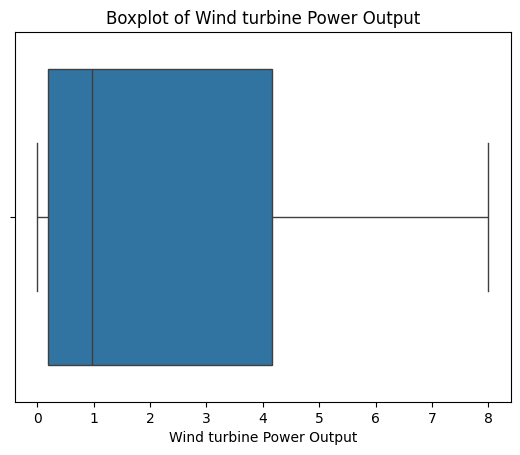

In [34]:
for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


##### *Note: The features has valid outlier which are feasible in the real world and hence we are not removing them from the dataset*


### *Feature Importance*

# ***Splitting the Dataset***

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, KFold

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline


### Splitting the Data

In [36]:
copydf = df.copy()

In [37]:
# Assuming 'Time' is your datetime column
copydf['Year'] = copydf['Time'].dt.year
copydf['Month'] = copydf['Time'].dt.month
copydf['Day'] = copydf['Time'].dt.day
copydf['Hour'] = copydf['Time'].dt.hour
# copydf['Minute'] = copydf['Time'].dt.minute
# copydf['Second'] = copydf['Time'].dt.second

# Now you can drop the original 'Time' column
copydf = copydf.drop(columns=['Time'],axis=1)

In [38]:
copydf

,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Wind turbine Power Output,Year,Month,Day,Hour
0,25.63279,4.805443,0,0.389832,2007,1,1,0
1,25.63279,4.303294,0,0.261417,2007,1,1,1
2,25.63279,2.636609,0,0.000000,2007,1,1,2
3,25.63279,3.167456,0,0.065723,2007,1,1,3
4,25.63279,4.522918,0,0.299256,2007,1,1,4
...,...,...,...,...,...,...,...,...
8755,25.52278,5.808934,0,0.924124,2007,12,31,19
8756,25.52278,5.503632,0,0.690560,2007,12,31,20
8757,25.52278,6.946388,0,2.057582,2007,12,31,21
8758,25.52278,6.045575,0,1.127979,2007,12,31,22


In [39]:
# Define the seasons based on month
def season(month):
    if month >= 3 and month <= 6:
        return 'summer'
    elif month >= 7 and month <= 10:
        return 'rainy'
    elif month >= 11 or month <= 2:
        return 'winter'
    else:
        return 'autumn'

# Apply the function to assign a season to each row
copydf['season'] = copydf['Month'].apply(season)

# Create separate DataFrames for each season
summer_df = copydf[copydf['season'] == 'summer']
rainy_df = copydf[copydf['season'] == 'rainy']
autumn_df = copydf[copydf['season'] == 'autumn']
winter_df = copydf[copydf['season'] == 'winter']

# Now you have four DataFrames: summer_df, rainy_df, autumn_df, and winter_df


In [40]:
rainy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2952 entries, 144 to 8255
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ambient Temperature            2952 non-null   float64
 1   Wind Speed                     2952 non-null   float64
 2   Wind turbine Operating Status  2952 non-null   int64  
 3   Wind turbine Power Output      2952 non-null   float64
 4   Year                           2952 non-null   int32  
 5   Month                          2952 non-null   int32  
 6   Day                            2952 non-null   int32  
 7   Hour                           2952 non-null   int32  
 8   season                         2952 non-null   object 
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 184.5+ KB


In [41]:
autumn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ambient Temperature            0 non-null      float64
 1   Wind Speed                     0 non-null      float64
 2   Wind turbine Operating Status  0 non-null      int64  
 3   Wind turbine Power Output      0 non-null      float64
 4   Year                           0 non-null      int32  
 5   Month                          0 non-null      int32  
 6   Day                            0 non-null      int32  
 7   Hour                           0 non-null      int32  
 8   season                         0 non-null      object 
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 0.0+ bytes


In [42]:
winter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ambient Temperature            2880 non-null   float64
 1   Wind Speed                     2880 non-null   float64
 2   Wind turbine Operating Status  2880 non-null   int64  
 3   Wind turbine Power Output      2880 non-null   float64
 4   Year                           2880 non-null   int32  
 5   Month                          2880 non-null   int32  
 6   Day                            2880 non-null   int32  
 7   Hour                           2880 non-null   int32  
 8   season                         2880 non-null   object 
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 180.0+ KB


In [43]:
summer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 48 to 8159
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ambient Temperature            2928 non-null   float64
 1   Wind Speed                     2928 non-null   float64
 2   Wind turbine Operating Status  2928 non-null   int64  
 3   Wind turbine Power Output      2928 non-null   float64
 4   Year                           2928 non-null   int32  
 5   Month                          2928 non-null   int32  
 6   Day                            2928 non-null   int32  
 7   Hour                           2928 non-null   int32  
 8   season                         2928 non-null   object 
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 183.0+ KB


In [44]:
# summer_df = summer_df.drop(columns=['Time'],axis=1)
# rainy_df = rainy_df.drop(columns=['Time'],axis=1)
# winter_df = winter_df.drop(columns=['Time'],axis=1)

In [45]:
summer_df = summer_df.drop(columns=['season'],axis=1)
rainy_df = rainy_df.drop(columns=['season'],axis=1)
winter_df = winter_df.drop(columns=['season'],axis=1)

In [46]:
summer_x = summer_df.drop("Wind turbine Power Output", axis = 1)
summer_y = summer_df["Wind turbine Power Output"]

rainy_x = rainy_df.drop("Wind turbine Power Output", axis = 1)
rainy_y = rainy_df["Wind turbine Power Output"]

winter_x = winter_df.drop("Wind turbine Power Output", axis = 1)
winter_y = winter_df["Wind turbine Power Output"]

In [47]:
summer_x

,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Year,Month,Day,Hour
48,25.63279,1.382488,0,2007,3,1,0
49,25.63279,0.352411,0,2007,3,1,1
50,25.63279,1.824942,0,2007,3,1,2
51,25.63279,2.730408,0,2007,3,1,3
52,25.63279,2.225222,0,2007,3,1,4
...,...,...,...,...,...,...,...
8155,25.52278,3.000240,0,2007,6,12,19
8156,25.52278,2.805890,0,2007,6,12,20
8157,25.52278,5.689714,0,2007,6,12,21
8158,25.52278,5.377182,0,2007,6,12,22


In [48]:
# 60% Train - 20% Val - 20% Test
x_train_or, x_test, y_train_or, y_test = train_test_split(summer_x, summer_y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_or, y_train_or, test_size=0.25)

In [49]:
# # 60% Train - 20% Val - 20% Test
# summer_x_train_or, summer_x_test, summer_y_train_or, summer_y_test = train_test_split(summer_x, summer_y, test_size=0.2)
# summer_x_train, summer_x_val,summer_y_train, summer_y_val = train_test_split(summer_x_train_or,summer_y_train_or, test_size=0.25)

#### *Defining a Function to Evaluate the Model*

In [50]:
def get_metrics(model):
    print(f'Train score {model.score(x_train, y_train)}')
    print(f'Val score {model.score(x_val, y_val)}')
    print("MAE:" , mean_absolute_error(y_val,model.predict(x_val)))
    print("MSE:" , mean_squared_error(y_val,model.predict(x_val)))
    print("RMSE:" , np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    print("R2:" , np.sqrt(r2_score(y_val,model.predict(x_val))))

    

# ***Model Training***

### ***Linear Regression***

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)
get_metrics(lr)

Train score 0.8519613924519397
Val score 0.8687869214531035
MAE: 0.7909640921889677
MSE: 0.865765745913017
RMSE: 0.9304653383726967
R2: 0.9320874001149804


### ***Polynomial Regression***

In [52]:
for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(x_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 0.8519613924519398
Val score 0.8687869214531035
MAE: 0.7909640921889676
MSE: 0.865765745913017
RMSE: 0.9304653383726967
R2: 0.9320874001149804
--------------------
Degree 2
Train score 0.8583701093921213
Val score 0.8725009812118147
MAE: 0.778109564335708
MSE: 0.8412597610449242
RMSE: 0.917202137505645
R2: 0.9340776098439652
--------------------
Degree 3
Train score 0.9753407971241517
Val score 0.9799283143681436
MAE: 0.3001411257231664
MSE: 0.13243632475694792
RMSE: 0.3639180192803702
R2: 0.9899132862873109
--------------------


Degree 4
Train score 0.9833307725634326
Val score 0.9777430746870555
MAE: 0.2928809204413575
MSE: 0.14685490012647479
RMSE: 0.38321651859813505
R2: 0.9888089171761425
--------------------
Degree 5
Train score 0.9974010242134542
Val score 0.996648629507325
MAE: 0.1177517126082651
MSE: 0.02211290068455007
RMSE: 0.14870407084054582
R2: 0.9983229084356048


### ***Lasso Regression***

In [53]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
get_metrics(lasso_model)

Train score 0.8390189214915579
Val score 0.8504634783032569
MAE: 0.8348622660139914
MSE: 0.9866668756022492
RMSE: 0.9933110668880364
R2: 0.9222057678757257


### ***Ridge Regression***

In [54]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
get_metrics(ridge_model)

Train score 0.851961390448611
Val score 0.868784607876658
MAE: 0.7909688928392464
MSE: 0.8657810112757328
RMSE: 0.9304735414162688
R2: 0.932086159041458


### ***Elastic Net Model***

In [55]:
EN_model = ElasticNet(alpha=1)
EN_model.fit(x_train, y_train)
get_metrics(EN_model)

Train score 0.842839601554427
Val score 0.8552703763006586
MAE: 0.8243447404534627
MSE: 0.9549501620220489
RMSE: 0.9772155146241022
R2: 0.9248082916478737


### ***Random Forest Regression***

In [56]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
get_metrics(rf)

Train score 0.999997497137163
Val score 0.9999943254373701
MAE: 0.003012698732388925
MSE: 3.744170933597369e-05
RMSE: 0.00611896309320245
R2: 0.99999716271466


### ***Decision Tree Regression***

In [57]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
get_metrics(dt)

Train score 1.0
Val score 0.9999854759023573
MAE: 0.004771971837883954
MSE: 9.583241524877944e-05
RMSE: 0.009789403212084966
R2: 0.9999927379248098


### ***eXtreme Gradient Boosting Regression***

In [58]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
get_metrics(xgb)

Train score 0.9999967979543436
Val score 0.9998939844120901
MAE: 0.013557214535131297
MSE: 0.0006995085060247928
RMSE: 0.026448223116587486
R2: 0.9999469908010574


In [59]:
# models = pd.DataFrame({
#     'Model': ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression','Elastic Net Model','Random Forest Regression', 'Decision Tree Regression', 'XGB Regression'],
#     'Score': [100*round(lr,4), 100*round(poly,4), 100*round(lasso_model,4), 100*round(ridge_model,4), 100*round(EN_model,4), 
#               100*round(rf,4), 100*round(dt,4), 100*round(xgb,4)]
# })
# models.sort_values(by = 'Score', ascending = False)

In [60]:
x_test

,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Year,Month,Day,Hour
1919,28.32309,4.869115,0,2007,3,21,23
2081,28.32309,4.424464,0,2007,3,28,17
2811,28.82314,4.597687,0,2007,4,28,3
4226,26.80292,3.474952,0,2007,6,26,2
3928,26.80292,16.386950,0,2007,6,13,16
...,...,...,...,...,...,...,...
4319,26.80292,7.313791,0,2007,6,29,23
2123,28.32309,3.348865,0,2007,3,30,11
2454,28.82314,3.167021,0,2007,4,13,6
2095,28.32309,1.821983,0,2007,3,29,7


In [61]:
winter_df

,Ambient Temperature,Wind Speed,Wind turbine Operating Status,Wind turbine Power Output,Year,Month,Day,Hour
0,25.63279,4.805443,0,0.389832,2007,1,1,0
1,25.63279,4.303294,0,0.261417,2007,1,1,1
2,25.63279,2.636609,0,0.000000,2007,1,1,2
3,25.63279,3.167456,0,0.065723,2007,1,1,3
4,25.63279,4.522918,0,0.299256,2007,1,1,4
...,...,...,...,...,...,...,...,...
8755,25.52278,5.808934,0,0.924124,2007,12,31,19
8756,25.52278,5.503632,0,0.690560,2007,12,31,20
8757,25.52278,6.946388,0,2.057582,2007,12,31,21
8758,25.52278,6.045575,0,1.127979,2007,12,31,22


In [226]:
y_test

845     0.811067
2761    0.384615
2656    0.783600
2747    0.000000
2938    0.447233
          ...   
3695    0.241284
1720    1.739488
3490    3.636200
8095    1.329361
1721    0.468743
Name: Wind turbine Power Output, Length: 586, dtype: float64

In [229]:
x_train.columns

Index(['Ambient Temperature', 'Wind Speed', 'Wind turbine Operating Status',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [62]:
import pickle
import pandas as pd
input_data = (25.52278,	6.045575,	0	,	2007,	12,	31,	22)
#Changing the input into numpy array and reshaping
# input_changed=np.array(input_data).reshape(1,-1)

#Standardize the input
# std_input = scaler.transform(input_changed)
feature_names = ['Ambient Temperature', 'Wind Speed', 'Wind turbine Operating Status',
       'Year', 'Month', 'Day', 'Hour']

with open("wind_rf.pkl","rb") as file:
        model = pickle.load(file)

input_df = pd.DataFrame([input_data],columns=feature_names)
prediction = model.predict(input_df)
print(prediction)

print('Predicted load forecast : ', prediction)

[1.12738545]
Predicted load forecast :  [1.12738545]


In [69]:
print(prediction-22.372390)
# 

[0.0801061]


Scaling the data

In [ ]:
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train.values)
# X_val_scaled = scaler.transform(X_val.values)
# X_test_scaled = scaler.transform(X_test.values)

# ***Saving the Model***

In [233]:
# import pickle

# with open("wind_rf.pkl","wb") as file:
#     pickle.dump(rf, file)

# ***Prediction***

In [1]:
ambient_temperature = float(input("Enter Ambient Temperature: "))
wind_speed = float(input("Enter Wind Speed: "))
wind_turbine_status = float(input("Enter Wind Turbine Operating Status (1 for operational, 0 for non-operational): "))
year = float(input("Enter Year: "))
month = float(input("Enter Month: "))
day = float(input("Enter Day: "))
hour = float(input("Enter Hour: "))

input_data = (ambient_temperature, wind_speed, wind_turbine_status, year, month, day, hour)

feature_names = ['Ambient Temperature', 'Wind Speed', 'Wind turbine Operating Status', 'Year', 'Month', 'Day', 'Hour']

with open("rf.pkl","rb") as file:
        model = pickle.load(file)

input_df = pd.DataFrame([input_data],columns=feature_names)
predicted_wind_power = model.predict(input_df)

print('Predicted Wind Power Output: ', predicted_wind_power)


ValueError: could not convert string to float: ''